## EECS 531 Assignment 1

Due Saturday Feb 15 before midnight. 120 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A1-yourcaseid.ipynb`
  - `EECS531-A1-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A1-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A1-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Some of exercises below aren't specified in great detail and you may need to spend sometime making sense of the questions themselves, which you can do from the readings and other sources.  You also might need to fill in some blanks or make some assumptions.  The spirit behind this approach is explained in [The Problem with Problems](http://web.mit.edu/6.969/www/readings/mazur.pdf) by Eric Mazur, which I encourage everyone to read.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  Since each exercise is only worth 5 pts, in terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Matthew E. Miller mem311@case.edu

### Exercise 1. Convolution (15 pts)

1.1 (5 pts) Using the discrete definition, show that convolution is a linear operation, i.e.

$$
(f + g) * c = f*c + g*c \quad \textrm{and} \quad (\lambda f)*c = \lambda(f*c)
$$

**Ans (1.1) Convolution as a Linear Operation:**
======
Convolution is distributive and commutative.

- Distributive:
Consider f(x), h(x), g(x).
f(x) * (g(x) * h(x)) = (f(x) * g(x)) * h(x)

- Commutative:
Consider the function f(x), h(x)
f(x) * h(x) = h(x) * f(x)

Convolution must be linear.

1.2. (5 pts) Show that the convolution of a separable two-dimensional filter kernel $\mathbf{K} = \mathbf{u}\mathbf{v^T}$ is equivalent to a 1-D horizontal convolution with kernel $\mathbf{h}$ followed by a 1-D vertical convolution with kernel $\mathbf{v}$.

**Ans (1.2)**
======
Per the definition of separable, the two-dimensional filter kernel can be represented by and is equivalent too a 1-D horizontal and 1-D vertical kernel convolution (see Szaliski).

1.3. (5 pts) Describe the advantages and limitations of such an approach.

**Ans (1.3)**
======
The **advantage** of implementing a 2D filter kernal as a 1D-horizontal and 1D-vertical convolution with kernels h and v is performance.  In many cases, operations can be significantly sped up by seperating the 2D filter kernel into two steps (1D-horizontal and 1D-vertical).  See pg 116 in szeliski.

The **limitation** is that not all 2D kernels are seperable.  To determine if a kernel K is indeed sperable, we must look at the analytic form of the kernel, or treat the 2D kernal as a 2D matrix and take its singular value decomposition (SVD).  If only the first singular value is non-zero, the kernal is seperable.

### Exercise 2.  Linear Filtering (20 pts)

Here you will write functions to implement 2D filtering.  Refer to Szeliski chapter 3 and more specifically section 3.2.  For this exercise, you should implement the filter functions "by hand", i.e. do not use a library.  Your answers should be explanatory.

2.1 (5 pts) Write a function that implements linear filtering (i.e. equation 3.12 or 3.14 in Szeliski).  Write a short "doc string" that explains your function and its arguments.  Also explain how you handled boundaries.

2.2 (5 pts) Demonstrate the correctness of your implementation.

2.3 (5 pts) Define blurring filters of different sizes and apply them to images.  Explain how the kernel structure achives the blurring operation, and illustrate it by showing original and filtered images side by side.

2.4 (5 pts) Define a different filter kernel (besides blurring).  Demonstrate it by apply it to images and explain how its structure achieves the intended function.  

Original Image


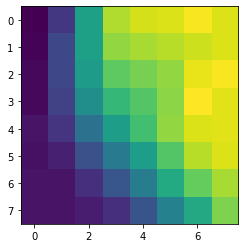

Linear Filtered Image


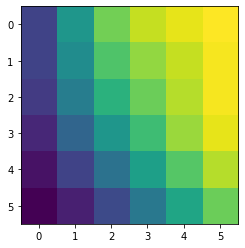

Showing correctness with another image, a bird.jfif
Bird image before removing depth-dimension


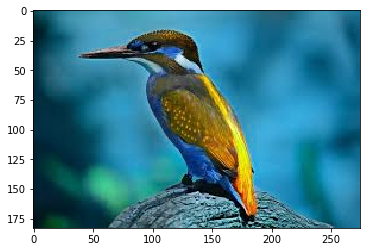

Bird image after removing depth-dimension


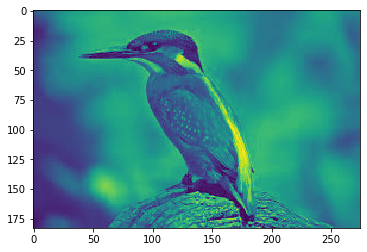

Bird Image resized to 8x8


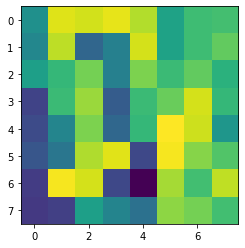

Linear Filtered Image


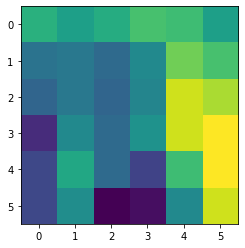

In [1]:
# 2.1 Implement a linear filtering function
import numpy as np 
import matplotlib.pyplot as plt
import cv2

# Weight Kernel for convolving the original image
weightKernel = np.array([[0.1,0.1,0.1],
                [0.1, 0.2, 0.1],
                [0.1, 0.1, 0.1]])

# Original Image (See Szaliski)
SzaliskiImg = np.array([[45,60,98,127,132,133,137,133],
                [46,65,98,123,126,128,131,133],
                [47,65,96,115,119,123,135,137],
                [47,63,91,107,113,122,138,134],
                [50,59,80,97,110,123,133,134],
                [49,53,68,83,97,113,128,133],
                [50,50,58,70,84,102,116,126],
                [50,50,52,58,69,86,101,120]])

print("Original Image")
plt.imshow(SzaliskiImg)
plt.show()

# Conducts the neighborhood linear filteringtaking a 3x3 matrix from the underlying image.
# After a 3x3 matrix is selected, its dot-product with the weight-kernel is calculated.
# The resulting matrix's trace-value is assigned to a result image[j][i].
# Where j is vertical index and i is horizontal index.

# I took the zero approach to handling borders
def linearKernel(img):
    i = 0
    j = 0
    result = np.array([[0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0],
                      [0,0,0,0,0,0]])
    
    for i in range(0,img.shape[0]-2):
        for j in range(0,img.shape[1]-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            result[j][i] = np.ceil(np.trace(np.dot(slice,weightKernel)))
    print("Linear Filtered Image")
    plt.imshow(result)
    plt.show()
    return result

SzaliskiImgFiltered = linearKernel(SzaliskiImg)

# Ans 2.2
# Also, can show correctness by citing Szaliski's work
print("Showing correctness with another image, a bird.jfif")
print("====================================================")
print("Bird image before removing depth-dimension")
birdImg = cv2.imread("birdImageComputerVisionA1.jfif")
plt.imshow(birdImg)
plt.show()
print("Bird image after removing depth-dimension")
birdImg = birdImg[:,:,1] # Remove the image depth, our kernel only deals with 2D-arrays, not 3D.
plt.imshow(birdImg)
plt.show()
print("Bird Image resized to 8x8")
birdImg = cv2.resize(birdImg, (8, 8)) 
plt.imshow(birdImg)
plt.show()
birdImgFiltered = linearKernel(birdImg)

Original, resized, but unblurred image


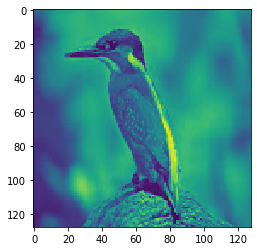

3x3 Kernel - Average Blur


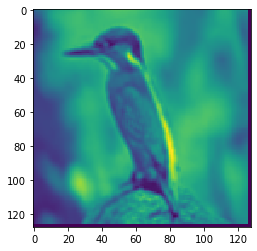

6x6 Kernel - Average Blur


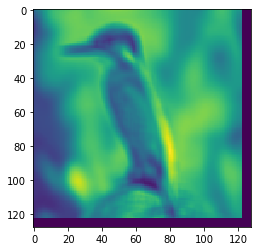

18x18 Kernel - Average Blur


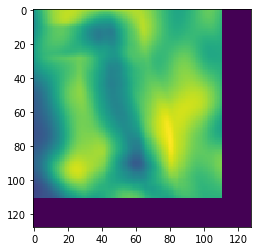

(408, 612, 3)
Original, resized, but unblurred image


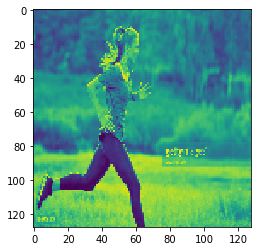

3x3 Kernel - Average Blur


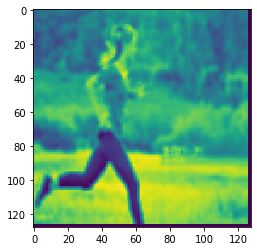

6x6 Kernel - Average Blur


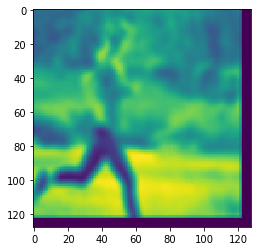

18x18 Kernel - Average Blur


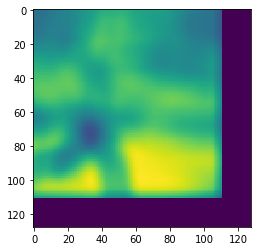

In [2]:
#2.3 blurring filters with a resizable kernel

import numpy as np 
import matplotlib.pyplot as plt
import cv2

# Different sized kernels
smBlurKernel = np.array([[1,1,1],[1, 1, 1],[1, 1, 1]])
mdBlurKernel = np.full((6,6), 1)
lgBlurKernel = np.full((18,18), 1)

# Original image which will be blurred
birdImg = cv2.imread("birdImageComputerVisionA1.jfif")
birdImg = birdImg[:,:,1] # Remove the image depth, our kernel only deals with 2D-arrays, not 3D.
birdImg = cv2.resize(birdImg, (128, 128)) 
print("Original, resized, but unblurred image")
plt.imshow(birdImg)
plt.show()

# I took the zero approach to handling borders
def smallBlurKernel(img):
    i = 0
    j = 0
    result = np.zeros((128,128),dtype=int)
    for i in range(0,img.shape[0]-2):
        for j in range(0,img.shape[1]-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            result[j][i] = np.ceil(np.trace(np.dot(slice,smBlurKernel)))
    print("3x3 Kernel - Average Blur")
    plt.imshow(result)
    plt.show()
    return result

def mediumBlurKernel(img):
    i = 0
    j = 0
    result = np.zeros((128,128),dtype=int)
    for i in range(0,img.shape[0]-5):
        for j in range(0,img.shape[1]-5):
            slice = np.array([img[j][i:i+6:1],
                            img[j+1][i:i+6:1],
                            img[j+2][i:i+6:1],
                            img[j+3][i:i+6:1],
                            img[j+4][i:i+6:1],
                            img[j+5][i:i+6:1]])
            result[j][i] = np.ceil(np.trace(np.dot(slice,mdBlurKernel)))
    print("6x6 Kernel - Average Blur")
    plt.imshow(result)
    plt.show()
    return result

def largeBlurKernel(img):
    i = 0
    j = 0
    result = np.zeros((128,128),dtype=int)
    for i in range(0,img.shape[0]-17):
        for j in range(0,img.shape[1]-17):
            # Sorry about this notation, I don't know the python syntax that well.
            slice = np.array([img[j][i:i+18:1],
                            img[j+1][i:i+18:1],
                            img[j+2][i:i+18:1],
                            img[j+3][i:i+18:1],
                            img[j+4][i:i+18:1],
                            img[j+5][i:i+18:1],
                            img[j+6][i:i+18:1],
                            img[j+7][i:i+18:1],
                            img[j+8][i:i+18:1],
                            img[j+9][i:i+18:1],
                            img[j+10][i:i+18:1],
                            img[j+11][i:i+18:1],
                            img[j+12][i:i+18:1],
                            img[j+13][i:i+18:1],
                            img[j+14][i:i+18:1],
                            img[j+15][i:i+18:1],
                            img[j+16][i:i+18:1],
                            img[j+17][i:i+18:1]])
            result[j][i] = np.ceil(np.trace(np.dot(slice,lgBlurKernel)))
    print("18x18 Kernel - Average Blur")
    plt.imshow(result)
    plt.show()
    return result

smBlurbird = smallBlurKernel(birdImg)
mdBlurbird = mediumBlurKernel(birdImg)
lgBlurbird = largeBlurKernel(birdImg)

# Additional Image for further testing
girlImg = cv2.imread("girlRunning.jpg")
print(girlImg.shape)
girlImg = girlImg[:,:,1] # Remove the image depth, our kernel only deals with 2D-arrays, not 3D.
girlImg = cv2.resize(girlImg, (128, 128)) 
print("Original, resized, but unblurred image")
plt.imshow(girlImg)
plt.show()

smBlurgirl = smallBlurKernel(girlImg)
mdBlurgirl = mediumBlurKernel(smBlurgirl)
lgBlurgirl = largeBlurKernel(mdBlurgirl)

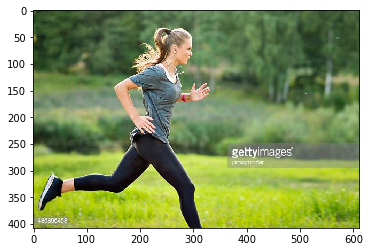

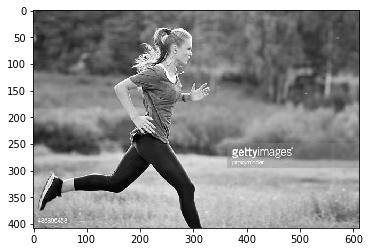

In [3]:
#2.4 Consturct a different kernel, not blurring.
# My kernel will convert to gray scale
# ( (0.3 * R) + (0.59 * G) + (0.11 * B) ).
import cv2
import numpy as np
import matplotlib.pyplot as plt

# *************************************** Grayscale Kernel (Works) *****************************************************************
## Read as BGR
img = cv2.imread("girlRunning.jpg")

kernel = np.array([[[ 0.07, 0.72,  0.21]]])
gray = cv2.convertScaleAbs(np.sum(img*kernel, axis=2))

# Display as RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Display convolved grayscale image
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

# ********************************* This kernel didn't work, it was an attempt to drag all the pixels toward red (or some other RGB color) *****************
# Weight Kernel for convolving the original image
#weightKernel = np.array([[0.1,0.1,0.1],
#                [0.1, 0.2, 0.1],
#                [0.1, 0.1, 0.1]])

# Original Image (See Szaliski)
#SzaliskiImg = np.array([[45,60,98,127,132,133,137,133],
#                [46,65,98,123,126,128,131,133],
#                [47,65,96,115,119,123,135,137],
#                [47,63,91,107,113,122,138,134],
#                [50,59,80,97,110,123,133,134],
#                [49,53,68,83,97,113,128,133],
#                [50,50,58,70,84,102,116,126],
#                [50,50,52,58,69,86,101,120]])

#def rgb_int2tuple(rgbint):
#    return (rgbint // 256 // 256 % 256, rgbint // 256 % 256, rgbint % 256)

#plt.imshow(SzaliskiImg)
#plt.show()
#aRes = np.zeros((8,8),dtype=int)
#for i in range(0,8):
#    for j in range(0,8):
#        tmp = rgb_int2tuple(SzaliskiImg[i][j])
#        tmp = tuple((tmp[0]+255, tmp[1], tmp[2]))
#        print(tmp)
#        tmp_rgb_int = tmp[0] << 16 | tmp[1] << 8 | tmp[2]
#        print(tmp_rgb_int)
#        aRes[i][j] = tmp_rgb_int
    
#print(aRes)
#print(SzaliskiImg)
#plt.imshow(aRes)
#plt.show()

### Exercise 3.  Non-linear Filtering (15 pts)

In this exercise you should also implement the filter by hand.  You should be able to modify your code from the previous exercise.

3.1 (5 pts) Define a function that implements some type of *non-linear* filtering.  

3.2 (5 pts) Show why this cannot be implemented by a linear filter.

3.3 (5 pts) Demonstrate this filter by applying it to images that are appropriate for illustrating its function.

Original Image


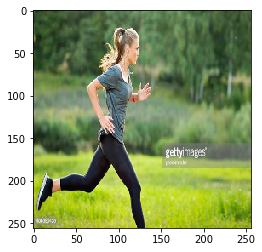

Median Filtered Image


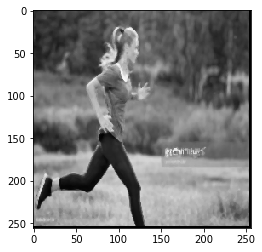

In [4]:
# See Szaliski for non-linear filtering approaches
# Chosing to do a non-linear median filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

# I took the zero approach to handling borders

girlimg = cv2.imread("girlRunning.jpg")

# Remove depth, kernel doesnt deal with 3D
girlimg = girlimg[:,:,1]

# Zero Padding
girlimg = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

girlimg = cv2.resize(img, (256, 256))

print("Original Image")
plt.imshow(cv2.cvtColor(girlimg, cv2.COLOR_BGR2RGB))
plt.show()

# 3x3 median kernel (Not needed for median filtering)
# kernel = np.array([[0,0,0],[0,0,0],[0,0,0]])

def medianFilter(img):
    i = 0
    j = 0
    
    result = np.zeros(img.shape, dtype=int)
    for i in range(0,img.shape[0]-2):
        for j in range(0,img.shape[1]-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            result[j][i] = np.median(slice)
    print("Median Filtered Image")
    plt.imshow(result)
    plt.show()

result = medianFilter(cv2.cvtColor(girlimg, cv2.COLOR_BGR2RGB))

**Ans (3.2)** This median filter can't be implemented by a linear filter because of the non-linear, sorted nature, of median selection.  Median is non-linear and can easily be proven by counter example that violates addativity property of linear functions.

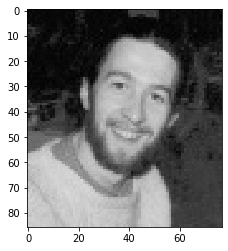

(64, 64, 3)
Original Image Little Noise


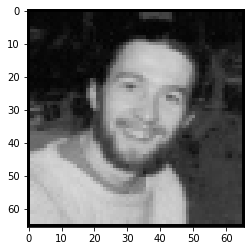

Median Filtered Image


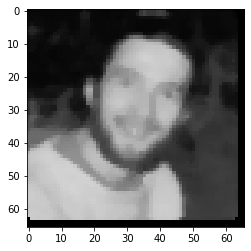

Original Image More Noise


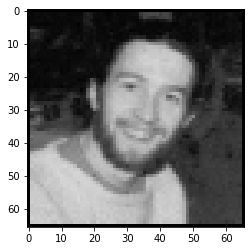

Median Filtered Image


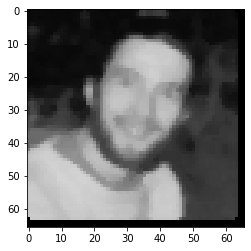

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# I took the zero approach to handling borders
noisyFace1 = cv2.imread("noisyFace1.jpg")
noisyFace2 = cv2.imread("noisyFace2.jpg")

plt.imshow(noisyFace1)
plt.show()

noisyFace1 = cv2.resize(noisyFace1,(64,64))
noisyFace2 = cv2.resize(noisyFace2,(64,64))

print(noisyFace1.shape)
# Remove depth, kernel doesnt deal with 3D
#noisyFace1 = noisyFace1[:,:,1]
#noisyFace2 = noisyFace2[:,:,1]

# Constant Padding
noisyFace1 = cv2.copyMakeBorder(noisyFace1, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
noisyFace2 = cv2.copyMakeBorder(noisyFace2, 1, 1, 1, 1, cv2.BORDER_CONSTANT)

def medianFilter(img):
    i = 0
    j = 0
    
    result = np.zeros(img.shape, dtype=int)
    for i in range(0,img.shape[0]-2):
        for j in range(0,img.shape[1]-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            result[j][i] = np.median(slice)
    print("Median Filtered Image")
    plt.imshow(result)
    plt.show()
    
print("Original Image Little Noise")
plt.imshow(noisyFace1)
plt.show()
medianFilter(noisyFace1)

print("Original Image More Noise")
plt.imshow(noisyFace2)
plt.show()
medianFilter(noisyFace2)

### Exercise 4. Edge Detection (30 pts)

In this exercise, you will need to choose an image processing libary that provides edge detection (see Szeliski chapter 4).  It should provide different types of edge detection and allow for control over smoothing.

4.1 (5 pts) Explain how you chose your library and what options you considered (briefly) and demonstrate the interface on two different types of edge detection algorithms.

4.2 (5 pts) Select a few noise-free images and show how edge detection can work at some scales but not at others.  Explain what is happening in terms of the edge-detection algorithm.

4.3 (5 pts) Add varying amounts of noise to an image and show how edge detection degrades.  Again explain what is happening in terms of the algorithm.

4.4 (5 pts) Now use these same noisy images but use smoothing to improve the edge detection and compare the results to the original noise-free image.

4.5 (5 pts) Select images to illustrate how an edge detection can detect numerous types of boundaries that correspond to distinct types of structure in the real world.

4.6 (5 pts) Now select images to illustrate different ways in which edge detection can fail, in the sense that the boundary is clear visible to us, but isn't detectable by the algorithm.

**Ans(4.1)** I chose openCV because it's a popular library that has a large collection of documention, python support, and I have experience using it.  One of its popular edge detection functions is the Canny edge-detection-algorith.  It also has Sobel and Lapacialian edge detection.  I thought that demonstrating these three edge detection approaches would provide nice contrast.  I also considered using pyTorch.

**Below is a demonstration of the different edge detection interfaces:**
**This script also shows how detection differently at differt scales, and in the case of Canny, at different thresholds.**

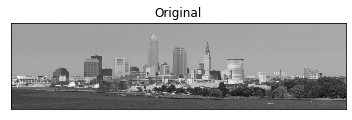

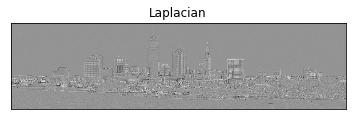

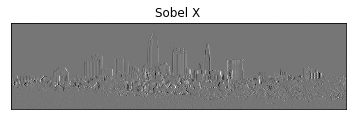

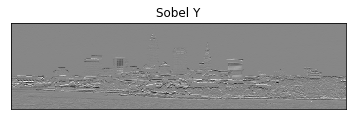

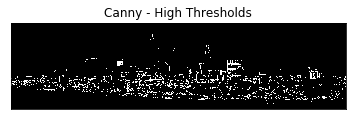

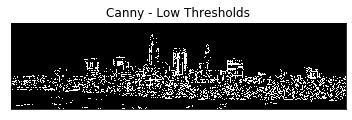

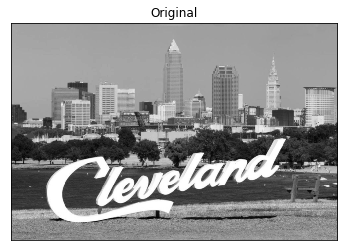

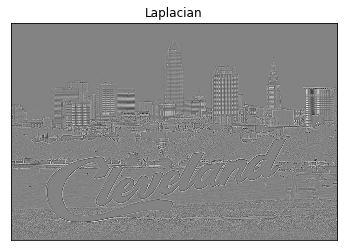

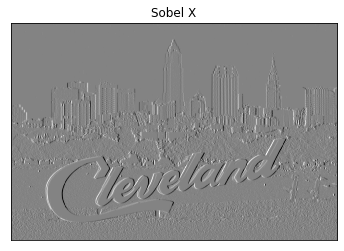

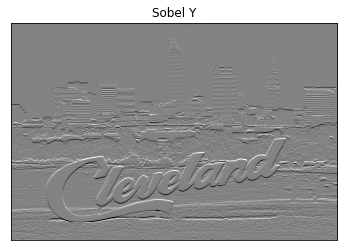

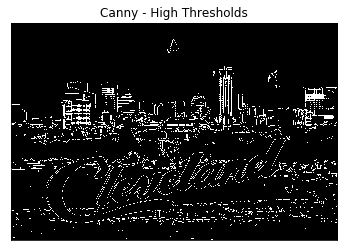

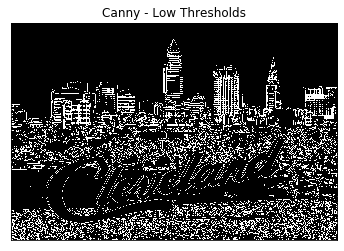

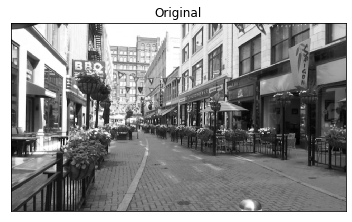

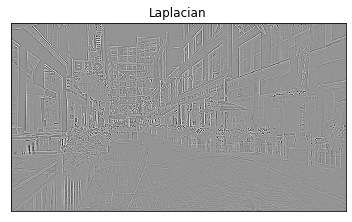

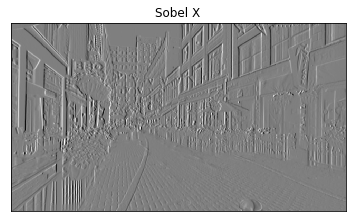

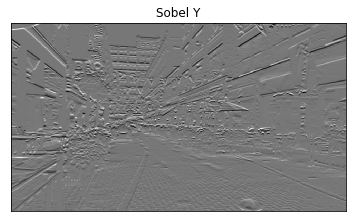

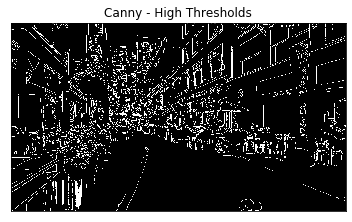

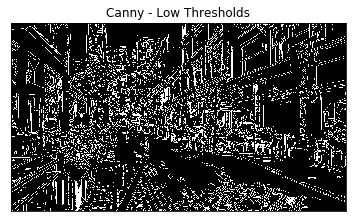

In [6]:
# Ans 4.2
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('Cleveland_Skyline.jfif',)
img1 = cv2.imread('Cleveland-Letters.jpg',)
img2 = cv2.imread('Cleveland_E4th.jfif',)

# converting to gray scale
grayCleSky = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
grayCleLetters = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayEFourth = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# remove noise
ClevelandSkyline = cv2.GaussianBlur(grayCleSky,(3,3),0)
ClevelandLetters = cv2.GaussianBlur(grayCleLetters,(3,3),0)
ClevelandEFourth = cv2.GaussianBlur(grayEFourth,(3,3),0)

# convolute with proper kernels
laplacianCleSky = cv2.Laplacian(ClevelandSkyline,cv2.CV_64F)
sobelxCleSky = cv2.Sobel(ClevelandSkyline,cv2.CV_64F,1,0,ksize=5)
sobelyCleSky = cv2.Sobel(ClevelandSkyline,cv2.CV_64F,0,1,ksize=5)
cannyCleSky1 = cv2.Canny(ClevelandSkyline,100,200)
cannyCleSky2 = cv2.Canny(ClevelandSkyline,20,100)

# convolute with proper kernels
laplacianCleLetters = cv2.Laplacian(ClevelandLetters,cv2.CV_64F)
sobelxCleLetters = cv2.Sobel(ClevelandLetters,cv2.CV_64F,1,0,ksize=5)
sobelyCleLetters = cv2.Sobel(ClevelandLetters,cv2.CV_64F,0,1,ksize=5)
cannyCleLetters1 = cv2.Canny(ClevelandLetters,100,200)
cannyCleLetters2 = cv2.Canny(ClevelandLetters,20,100)

# convolute with proper kernels
laplacianEFourth = cv2.Laplacian(ClevelandEFourth,cv2.CV_64F)
sobelxEFourth = cv2.Sobel(ClevelandEFourth,cv2.CV_64F,1,0,ksize=5)
sobelyEFourth = cv2.Sobel(ClevelandEFourth,cv2.CV_64F,0,1,ksize=5)
cannyEFourth1 = cv2.Canny(ClevelandEFourth,100,200)
cannyEFourth2 = cv2.Canny(ClevelandEFourth,20,100)

# ============================ Sky Line ============================
plt.imshow(ClevelandSkyline,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacianCleSky,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxCleSky,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelyCleSky,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleSky1,cmap = 'gray')
plt.title('Canny - High Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleSky2,cmap = 'gray')
plt.title('Canny - Low Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

# ============================ Letters ============================
plt.imshow(ClevelandLetters,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacianCleLetters,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxCleLetters,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelyCleLetters,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleLetters1,cmap = 'gray')
plt.title('Canny - High Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleLetters2,cmap = 'gray')
plt.title('Canny - Low Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

# ============================ Letters ============================
plt.imshow(ClevelandEFourth,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacianEFourth,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxEFourth,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelyEFourth,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyEFourth1,cmap = 'gray')
plt.title('Canny - High Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyEFourth2,cmap = 'gray')
plt.title('Canny - Low Thresholds'), plt.xticks([]), plt.yticks([])
plt.show()

**Ans 4.2 Cont.** 
Description of the edge detection algorithms:
Laplacian - Sensitive to noise, this approach measures rates of rapid intensity change, highlighting them within the image.  It accomplishes this by calculating the 2nd spatial derivative.  Put another way, Laplacian methods search for zero crossings in the second derivative of an image.

Sobel X - This is a gradient approach to edge detection. It works by calculating image intensity gradients at each pixel.  Then, it finds the direction of largest increase from light to dark and rate of change.  In this case, it evaluates changes along the horizontal axis.

Sobel Y - This is a gradient approach to edge detection. It works by calculating image intensity gradients at each pixel.  Then, it finds the direction of largest increase from light to dark and rate of change.  In this case, it evaluates changes along the vertical axis.

Canny - This is a multi-step algorithm that is more resillient to noise. It does noise suppress at the beginning, uses a gradient approach to evaluate features, applys a threshold to maximize the preservation of important features and disposal of noise, and links edge segments to create continous structures.

**Ans 4.3 and 4.4**
In this section, we add some noise to an image to demonstrate the effect on edge detection.

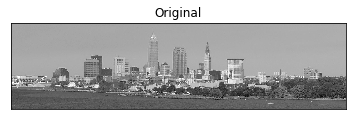

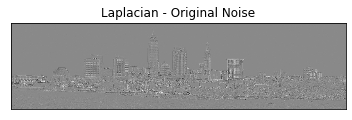

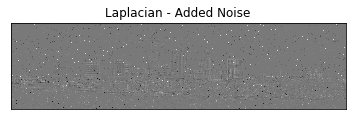

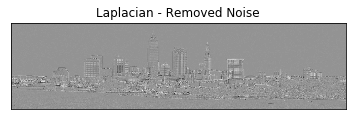

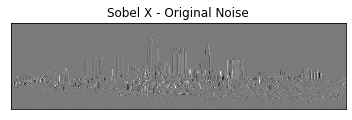

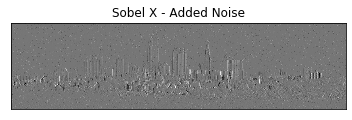

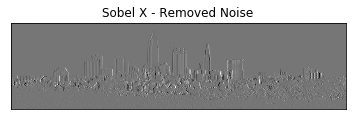

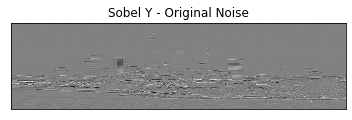

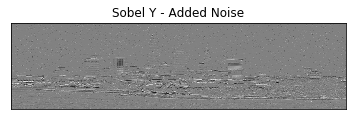

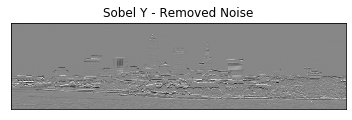

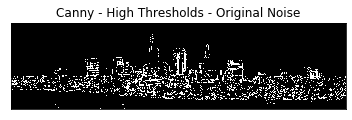

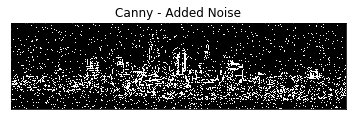

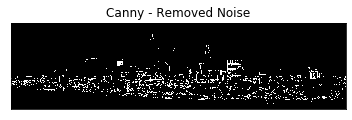

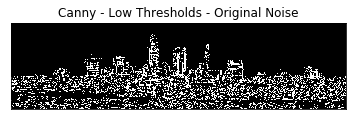

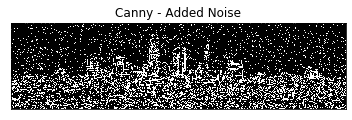

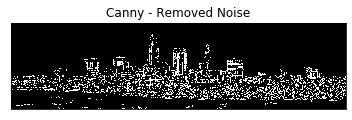

In [7]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# This is generates the salt and pepper noise
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# loading image
img0 = cv2.imread('Cleveland_Skyline.jfif')

# converting to gray scale
grayCleSky = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# Base Noise
laplacianCleSky = cv2.Laplacian(grayCleSky,cv2.CV_64F)
sobelxCleSky = cv2.Sobel(grayCleSky,cv2.CV_64F,1,0,ksize=5)
sobelyCleSky = cv2.Sobel(grayCleSky,cv2.CV_64F,0,1,ksize=5)
cannyCleSky1 = cv2.Canny(grayCleSky,100,200)
cannyCleSky2 = cv2.Canny(grayCleSky,20,100)

# Added Noise
noisySky = sp_noise(grayCleSky, 0.005)
noisylaplacianCleSky = cv2.Laplacian(noisySky,cv2.CV_64F)
noisysobelxCleSky = cv2.Sobel(noisySky,cv2.CV_64F,1,0,ksize=5)
noisysobelyCleSky = cv2.Sobel(noisySky,cv2.CV_64F,0,1,ksize=5)
noisycannyCleSky1 = cv2.Canny(noisySky,100,200)
noisycannyCleSky2 = cv2.Canny(noisySky,20,100)

# remove noise
reducedNoiseSkyline = cv2.GaussianBlur(grayCleSky,(3,3),0)

# Removed Noise
lowNoiselaplacianCleSky = cv2.Laplacian(reducedNoiseSkyline,cv2.CV_64F)
lowNoisesobelxCleSky = cv2.Sobel(reducedNoiseSkyline,cv2.CV_64F,1,0,ksize=5)
lowNoisesobelyCleSky = cv2.Sobel(reducedNoiseSkyline,cv2.CV_64F,0,1,ksize=5)
lowNoisecannyCleSky1 = cv2.Canny(reducedNoiseSkyline,100,200)
lowNoisecannyCleSky2 = cv2.Canny(reducedNoiseSkyline,20,100)

# ============================ Sky Line ============================
plt.imshow(grayCleSky,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(laplacianCleSky,cmap = 'gray')
plt.title('Laplacian - Original Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(noisylaplacianCleSky,cmap = 'gray')
plt.title('Laplacian - Added Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(lowNoiselaplacianCleSky,cmap = 'gray')
plt.title('Laplacian - Removed Noise'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelxCleSky,cmap = 'gray')
plt.title('Sobel X - Original Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(noisysobelxCleSky,cmap = 'gray')
plt.title('Sobel X - Added Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(lowNoisesobelxCleSky,cmap = 'gray')
plt.title('Sobel X - Removed Noise'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(sobelyCleSky,cmap = 'gray')
plt.title('Sobel Y - Original Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(noisysobelyCleSky,cmap = 'gray')
plt.title('Sobel Y - Added Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(lowNoisesobelyCleSky,cmap = 'gray')
plt.title('Sobel Y - Removed Noise'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleSky1,cmap = 'gray')
plt.title('Canny - High Thresholds - Original Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(noisycannyCleSky1,cmap = 'gray')
plt.title('Canny - Added Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(lowNoisecannyCleSky1,cmap = 'gray')
plt.title('Canny - Removed Noise'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cannyCleSky2,cmap = 'gray')
plt.title('Canny - Low Thresholds - Original Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(noisycannyCleSky2,cmap = 'gray')
plt.title('Canny - Added Noise'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(lowNoisecannyCleSky2,cmap = 'gray')
plt.title('Canny - Removed Noise'), plt.xticks([]), plt.yticks([])
plt.show()

As you can see, even a small amount of noise (0.05%) seriously degrades the ability to detect edges accruately.  Some approaches, like the Canny algorithm were esspecially susceptable to the salt & pepper noise.  However, had I used a different type of noise, I suspect it would have been less impactful.  Note that, at higher levels of noise (0.5%), the edge detection is almost rendered completely useless.  You can adjust the salt & pepper probabilty in the script (near top).

**Ans 4.5** 
Here I select some images that display how edge detection can detect distint types of boundaries.  In this case, I select three different images that show how different types of structure can be detected.



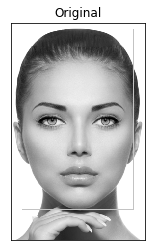

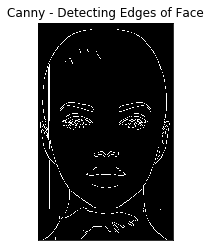

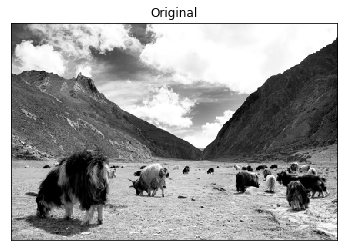

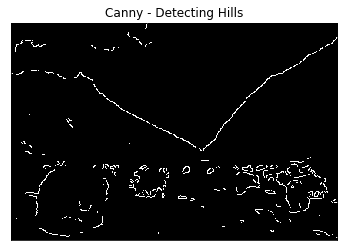

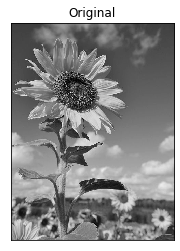

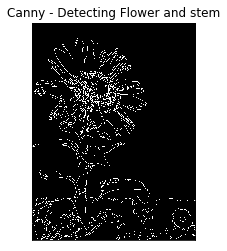

In [8]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('womenFace.png')
img1 = cv2.imread('hill_small.jpg')
img2 = cv2.imread('sunflower.jpg')

# converting to gray scale
grayWoman = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
grayHill = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
graySunFlower = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# remove noise
woman = cv2.GaussianBlur(grayWoman,(3,3),0)
hill = cv2.GaussianBlur(grayHill,(3,3),0)
sunflower = cv2.GaussianBlur(graySunFlower,(3,3),0)

# Reduced Noise
cannyWoman = cv2.Canny(woman,100,200)
cannyHill = cv2.Canny(hill,300,400)
cannySunFlower = cv2.Canny(sunflower,100,200)

# ============================ Sky Line ============================
plt.imshow(grayWoman,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyWoman,cmap = 'gray')
plt.title('Canny - Detecting Edges of Face'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(grayHill,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyHill,cmap = 'gray')
plt.title('Canny - Detecting Hills'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(graySunFlower,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannySunFlower,cmap = 'gray')
plt.title('Canny - Detecting Flower and stem'), plt.xticks([]), plt.yticks([])
plt.show()

**Ans 4.6**
This section demonstrates how edge detection can miss features that are apparent to us.

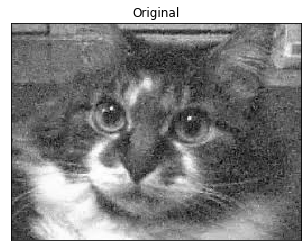

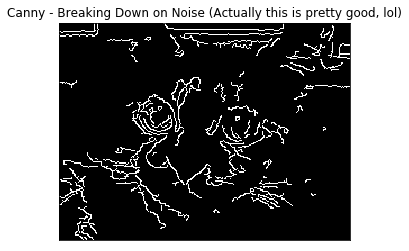

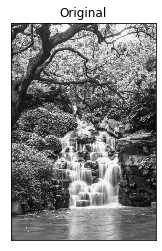

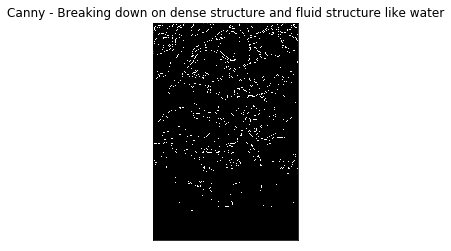

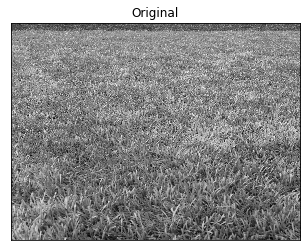

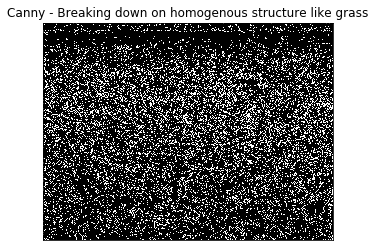

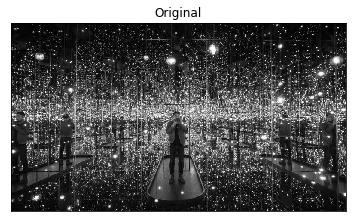

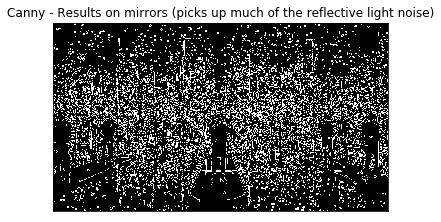

In [9]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# loading image
img0 = cv2.imread('cat.jfif')
img1 = cv2.imread('waterfall.jpg')
img2 = cv2.imread('grass.jpg')
img3 = cv2.imread('mirror.jpg')

# converting to gray scale
grayCat = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
grayWaterfall = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grayGrass = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
grayMirror = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# remove noise
cat = cv2.GaussianBlur(grayCat,(3,3),0)
waterfall = cv2.GaussianBlur(grayWaterfall,(3,3),0)
grass = cv2.GaussianBlur(grayGrass,(3,3),0)
mirror = cv2.GaussianBlur(grayMirror,(3,3),0)

# Reduced Noise
cannyCat = cv2.Canny(cat,100,200)
cannyWaterfall = cv2.Canny(waterfall,300,400)
cannyGrass = cv2.Canny(grass,100,200)
cannyMirror = cv2.Canny(mirror,100,200)

# ============================ Sky Line ============================
plt.imshow(grayCat,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyCat,cmap = 'gray')
plt.title('Canny - Breaking Down on Noise (Actually this is pretty good, lol)'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(grayWaterfall,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyWaterfall,cmap = 'gray')
plt.title('Canny - Breaking down on dense structure and fluid structure like water'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(grayGrass,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyGrass,cmap = 'gray')
plt.title('Canny - Breaking down on homogenous structure like grass'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(grayMirror,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cannyMirror,cmap = 'gray')
plt.title('Canny - Results on mirrors (picks up much of the reflective light noise)'), plt.xticks([]), plt.yticks([])
plt.show()

### Exploration (40 pts)

In these problems, you are meant to do creative exploration. This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- any of the exercises in Szeliski Ch. 3.

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|


For this section I am going to explore face recognition and identification.  It has been a long held goal of mind to experiment with face-id and tracking faces within scenes.  I believe that a keep part of face detection is edge detection, and so, I think this is an appropriate topic to explore.  Furthermore, I'd like to see how I might improve my face-detection results by deploying techniques like Guassian smoothing and other image preprocessing steps.

To do this, I will explore a couple methods to face-id.

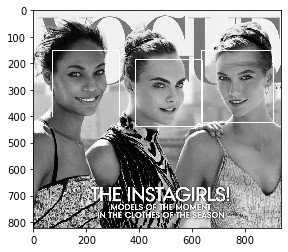

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
vogue = cv2.imread('vogue.jpg')

# Convert to grayscale
grayVogue = cv2.cvtColor(vogue, cv2.COLOR_BGR2GRAY)

# Detect faces
vogueFaces = face_cascade.detectMultiScale(grayVogue, 1.28, 4)

# Draw rectangle around the faces
for (x, y, w, h) in vogueFaces:
    cv2.rectangle(grayVogue, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
plt.imshow(grayVogue, cmap = 'gray')
plt.show()

Okay, so we have detected a few of these models' faces, but it wasn't exacly easy and the results were difficult to achieve.  It took a lot of manually configuring the scale-factor and number-of-neighbor parameters to get those squares around faces.  Maybe the classifier will preform better on people that aren't top 1% of beauty? Let's see.

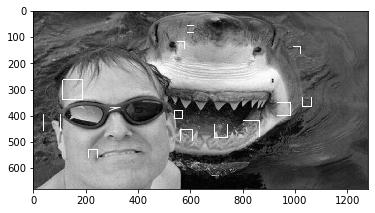

Results turn out to be even worse, depending on how the parameters are adjusted, there is either too many false faces detected or none at all...


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
someRegularGuy = cv2.imread('regular guy.jpg')
regularGroup = cv2.imread('group.jpg')

# Convert to grayscale
grayRegularGuy = cv2.cvtColor(someRegularGuy, cv2.COLOR_BGR2GRAY)

# Detect faces
regularFaces = face_cascade.detectMultiScale(grayRegularGuy, 1.01, 6)

# Draw rectangle around the faces
for (x, y, w, h) in regularFaces:
    cv2.rectangle(grayRegularGuy, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
plt.imshow(grayRegularGuy, cmap = 'gray')
plt.show()
print("Results turn out to be even worse, depending on how the parameters are adjusted, there is either too many false faces detected or none at all...")

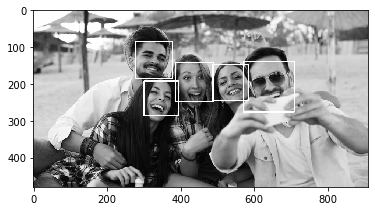

WOW! First attempt, all of the faces are perfectly identified.  I didn't have to test many configurations and there are no false positives.


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
regularGroup = cv2.imread('group.jpg')

# Convert to grayscale
grayRegularGroup = cv2.cvtColor(regularGroup, cv2.COLOR_BGR2GRAY)

# Detect faces
regularFaces = face_cascade.detectMultiScale(regularGroup, 1.1, 5)

# Draw rectangle around the faces
for (x, y, w, h) in regularFaces:
    cv2.rectangle(grayRegularGroup, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the output
plt.imshow(grayRegularGroup, cmap = 'gray')
plt.show()
print("WOW! First attempt, all of the faces are perfectly identified.  I didn't have to test many configurations and there are no false positives.")

Okay, so the group of regular people works well for the facial recognition.  Now, can I apply a blur kernel to protect these peoples' privacy?  Let's see.

3x3 Kernel - Average Blur


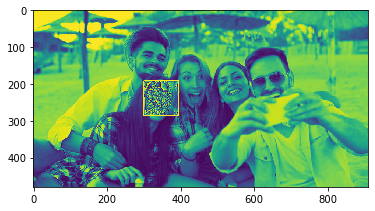

3x3 Kernel - Average Blur


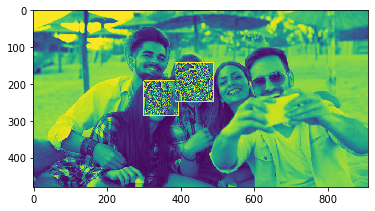

3x3 Kernel - Average Blur


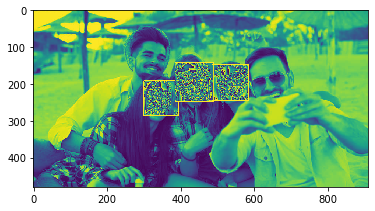

3x3 Kernel - Average Blur


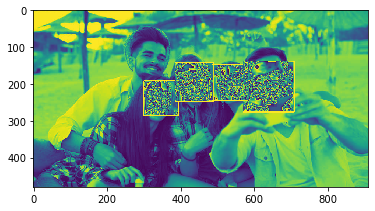

3x3 Kernel - Average Blur


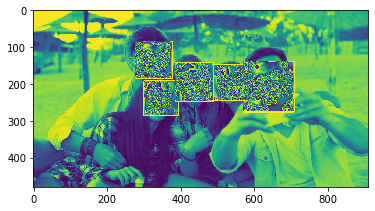

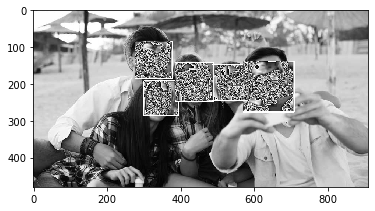

Wow! It actually kind of works!  I am going to try and add some salt and pepper noise, to further obscure their faces...


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
regularGroup = cv2.imread('group.jpg')

# Convert to grayscale
grayRegularGroup = cv2.cvtColor(regularGroup, cv2.COLOR_BGR2GRAY)

# Detect faces
regularFaces = face_cascade.detectMultiScale(regularGroup, 1.1, 5)

smBlurKernel = np.array([[1,1,1],[1, 1, 1],[1, 1, 1]])

# I took the zero approach to handling borders
def smallBlurKernel(img,x,y,w,h):
    i = 0
    j = 0
    result = np.zeros((128,128),dtype=int)
    for i in range(x,x+w-2):
        for j in range(y,y+h-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            img[j][i] = np.ceil(np.trace(np.dot(slice,smBlurKernel)))
    print("3x3 Kernel - Average Blur")
    plt.imshow(img)
    plt.show()
    return img

# Draw rectangle around the faces
for (x, y, w, h) in regularFaces:
    cv2.rectangle(grayRegularGroup, (x, y), (x+w, y+h), (255, 0, 0), 2)
    smallBlurKernel(grayRegularGroup,x,y,w,h)
    

# Display the output
plt.imshow(grayRegularGroup, cmap = 'gray')
plt.show()
print("Wow! It actually kind of works!  I am going to try and add some salt and pepper noise, to further obscure their faces...")

Blurring their faces actually kind of works, so I am going to try and further obscure them with salt and pepper noise.  Then, maybe we will try and see if the faces can be identifies after being obscured?

3x3 Kernel - Average Blur


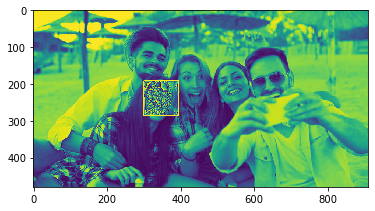

3x3 Kernel - Average Blur


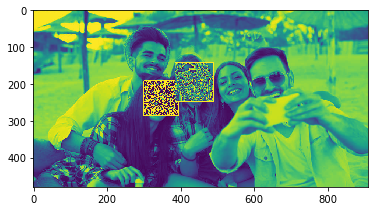

3x3 Kernel - Average Blur


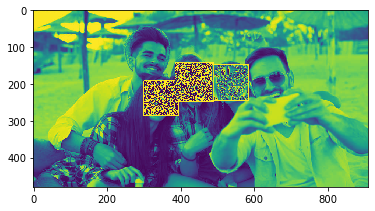

3x3 Kernel - Average Blur


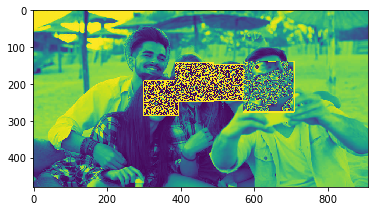

3x3 Kernel - Average Blur


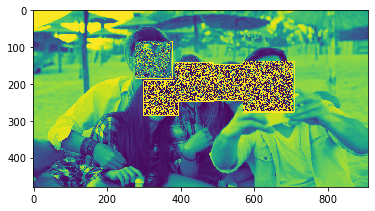

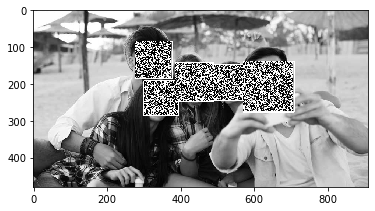

So that also works, and it should be noted that blurring before the salt and peper is more effective.
It should also be noted that it would probably be easier to just fill in the rectangles around the faces...


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
regularGroup = cv2.imread('group.jpg')

# Convert to grayscale
grayRegularGroup = cv2.cvtColor(regularGroup, cv2.COLOR_BGR2GRAY)

# Detect faces
regularFaces = face_cascade.detectMultiScale(regularGroup, 1.1, 5)

smBlurKernel = np.array([[1,1,1],[1, 1, 1],[1, 1, 1]])

# I took the zero approach to handling borders
def smallBlurKernel(img,x,y,w,h):
    i = 0
    j = 0
    for i in range(x,x+w-2):
        for j in range(y,y+h-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            img[j][i] = np.ceil(np.trace(np.dot(slice,smBlurKernel)))
    print("3x3 Kernel - Average Blur")
    plt.imshow(img)
    plt.show()
    return img

# This is generates the salt and pepper noise
def sp_noise(img,prob,x,y,w,h):
    thres = 1 - prob
    i = 0
    j = 0
    for i in range(x,x+w-2):
        for j in range(y,y+h-2):
            rdn = random.random()
            if rdn < prob:
                img[j][i] = 0
            elif rdn > thres:
                img[j][i] = 255
    return img

# Draw rectangle around the faces
for (x, y, w, h) in regularFaces:
    cv2.rectangle(grayRegularGroup, (x, y), (x+w, y+h), (255, 0, 0), 2)
    smallBlurKernel(grayRegularGroup,x,y,w,h)
    sp_noise(grayRegularGroup,0.4,x,y,w,h)

# Display the output
plt.imshow(grayRegularGroup, cmap = 'gray')
plt.show()
print("So that also works, and it should be noted that blurring before the salt and peper is more effective.")
print("It should also be noted that it would probably be easier to just fill in the rectangles around the faces...")

This shows how the faces could be more easily obscured by simply filling the rectangles.

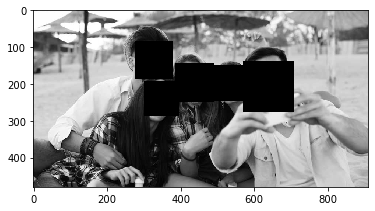

This also works well, but it might be too obvious that faces were ubstructed
Also, you could probably easily implement a face swapping program with this approach.


In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
regularGroup = cv2.imread('group.jpg')

# Convert to grayscale
grayRegularGroup = cv2.cvtColor(regularGroup, cv2.COLOR_BGR2GRAY)

# Detect faces
regularFaces = face_cascade.detectMultiScale(regularGroup, 1.1, 5)

smBlurKernel = np.array([[1,1,1],[1, 1, 1],[1, 1, 1]])

# I took the zero approach to handling borders
def smallBlurKernel(img,x,y,w,h):
    i = 0
    j = 0
    for i in range(x,x+w-2):
        for j in range(y,y+h-2):
            slice = np.array([img[j][i:i+3:1],
                            img[j+1][i:i+3:1],
                            img[j+2][i:i+3:1]])
            img[j][i] = np.ceil(np.trace(np.dot(slice,smBlurKernel)))
    print("3x3 Kernel - Average Blur")
    plt.imshow(img)
    plt.show()
    return img

# This is generates the salt and pepper noise
def sp_noise(img,prob,x,y,w,h):
    thres = 1 - prob
    i = 0
    j = 0
    for i in range(x,x+w-2):
        for j in range(y,y+h-2):
            rdn = random.random()
            if rdn < prob:
                img[j][i] = 0
            elif rdn > thres:
                img[j][i] = 255
    return img

# Draw rectangle around the faces
for (x, y, w, h) in regularFaces:
    cv2.rectangle(grayRegularGroup, (x, y), (x+w, y+h), (0, 0, 0), -1)

# Display the output
plt.imshow(grayRegularGroup, cmap = 'gray')
plt.show()
print("This also works well, but it might be too obvious that faces were ubstructed")
print("Also, you could probably easily implement a face swapping program with this approach.")

Okay, so this has been very fun, but I am out of time.  I wanted to try one other face-id library and see how those results are.  This library is called face_recognition and it's open source, python stuff.

In [16]:
#import face_recognition
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

#image = face_recognition.load_image_file("group.jpg")
#face_locations = face_recognition.face_locations(image)

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#plt.imshow(image, cmap='gray')
#plt.show()

# OUT OF TIME, SEEMS PROMISING THOUGH.  NEED CMAKE TO BUILD PACKAGE.